In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

In [2]:
data = pd.read_csv("card_transdata.csv")
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [3]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


data.info shows that there are no missing values in any of the features

In [4]:
data.nunique()

distance_from_home                1000000
distance_from_last_transaction    1000000
ratio_to_median_purchase_price    1000000
repeat_retailer                         2
used_chip                               2
used_pin_number                         2
online_order                            2
fraud                                   2
dtype: int64

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,1000000.0,26.628792,65.390784,0.004874,3.878008,9.967760,25.743985,10632.723672
distance_from_last_transaction,1000000.0,5.036519,25.843093,0.000118,0.296671,0.998650,3.355748,11851.104565
ratio_to_median_purchase_price,1000000.0,1.824182,2.799589,0.004399,0.475673,0.997717,2.096370,267.802942
repeat_retailer,1000000.0,0.881536,0.323157,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,1000000.0,0.350399,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,1000000.0,0.100608,0.300809,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,1000000.0,0.650552,0.476796,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,1000000.0,0.087403,0.282425,0.000000,0.000000,0.000000,0.000000,1.000000


As shown in the table above in the first three features we can see that there is a large distance between the min and max, when we notice the mean we can infer that it is possible that there are outlier, then we will visualize all the features of the dataset to analyze and better observe this phenomenon.

distance_from_home
Skew : 20.24


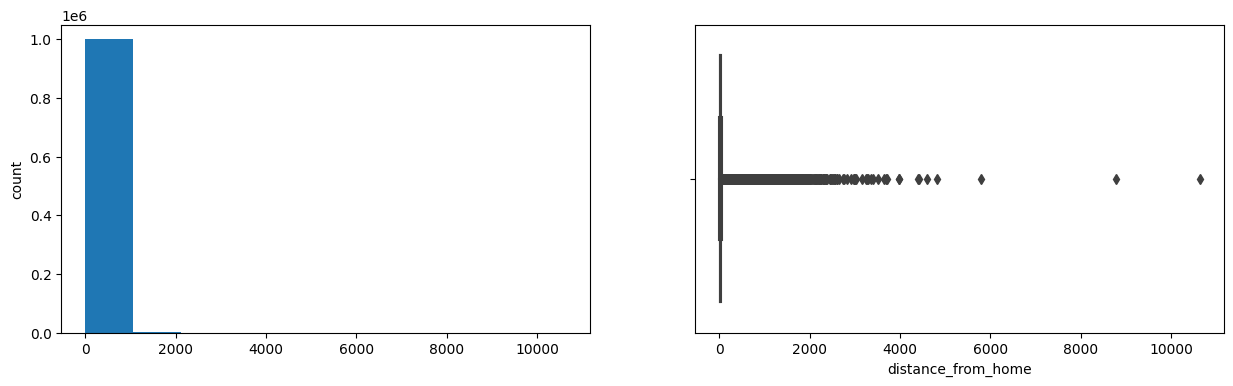

distance_from_last_transaction
Skew : 125.92


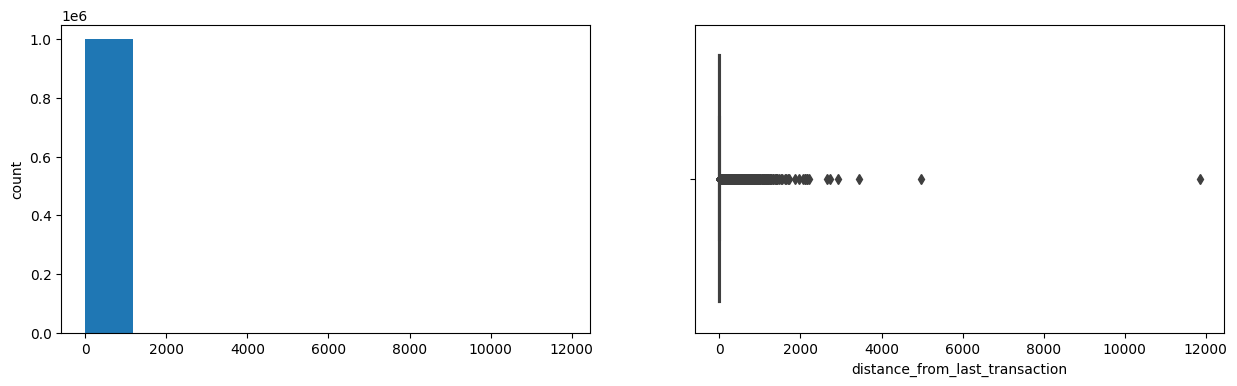

ratio_to_median_purchase_price
Skew : 8.92


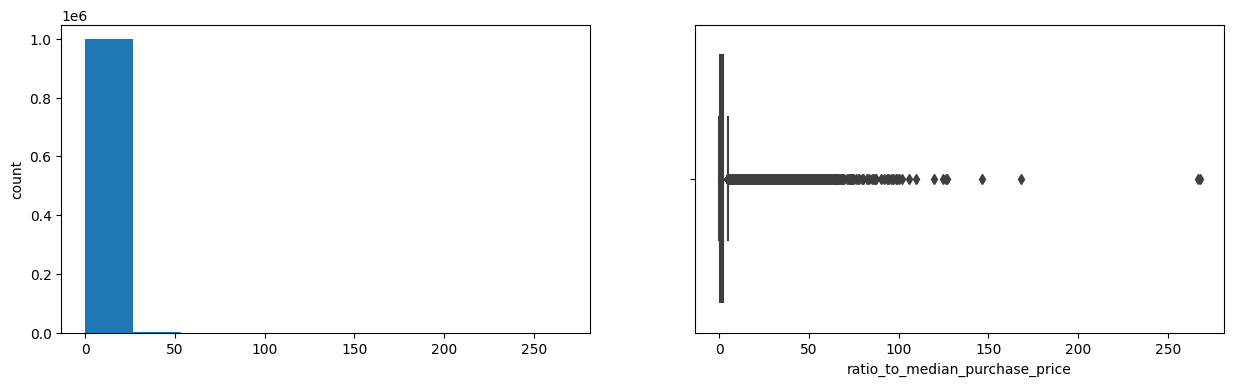

In [6]:
i = 0 
for colum in data.columns:
    i+=1
    print(colum)
    print('Skew :', round(data[colum].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[colum].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[colum])
    plt.show()
    if i == 3: break

Using the graphs we were able to verify that there are indeed outliers in the data of the first three features of our dataset(distance_from_home, distance_from_last_transaction, ratio_to_median_purchase_price).

Outliers can significantly affect the performance and accuracy of the models, to deal with these outliers we will use the Winsorizing technique.

Let's see a graph of the distribution of the data for these features 

In [7]:
for i in range(3):
    sns.displot(data[data.columns[i]])

The following is a bivariate analysis of the feautures

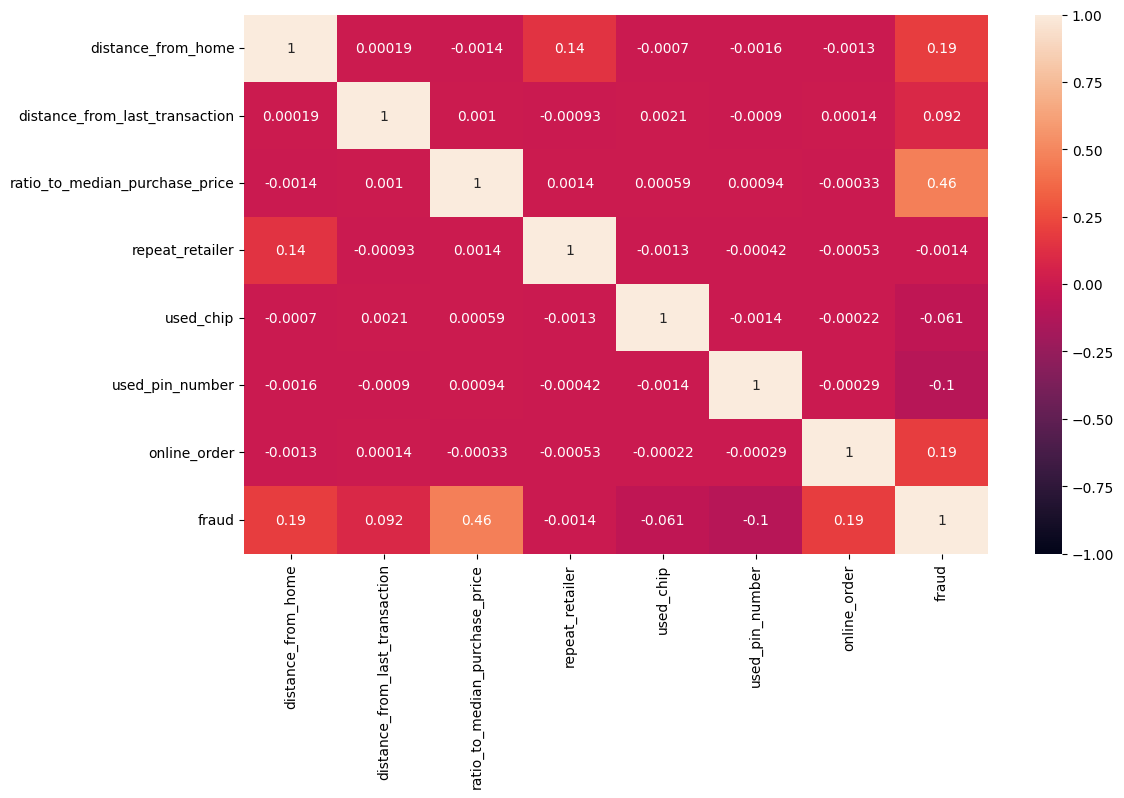

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

Our target feature is fraud, so we are going to focus mainly on the correlation of this feature with the rest of the feautures of the dataset, in this case the correlation of fraud with the feauters ratio to median purchase price, online order and distance for home stands out.

#### Winsorizing.
Similar to truncation, winsorizing involves replacing outliers with more extreme values that are not outliers. This reduces the impact of outliers but avoids complete loss of information.

In [ ]:
for i in range(3):
    
    winsorize(data[data.columns[i]],limits=[0.15,0.15], inplace= True)
data.to_csv('data_winsorize.csv', index=False)
data_winsorize = pd.read_csv("data_winsorize.csv")
data_winsorize.describe().T



,count,mean,std,min,25%,50%,75%,max
distance_from_home,1000000.0,16.088304,14.523740,2.336379,3.878008,9.967760,25.743985,42.672271
distance_from_last_transaction,1000000.0,2.098832,2.273686,0.154355,0.296671,0.998650,3.355748,6.437952
ratio_to_median_purchase_price,1000000.0,1.352925,1.001836,0.319386,0.475673,0.997717,2.096370,3.116252
repeat_retailer,1000000.0,0.881536,0.323157,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,1000000.0,0.350399,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,1000000.0,0.100608,0.300809,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,1000000.0,0.650552,0.476796,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,1000000.0,0.087403,0.282425,0.000000,0.000000,0.000000,0.000000,1.000000


distance_from_home
Skew : 0.85


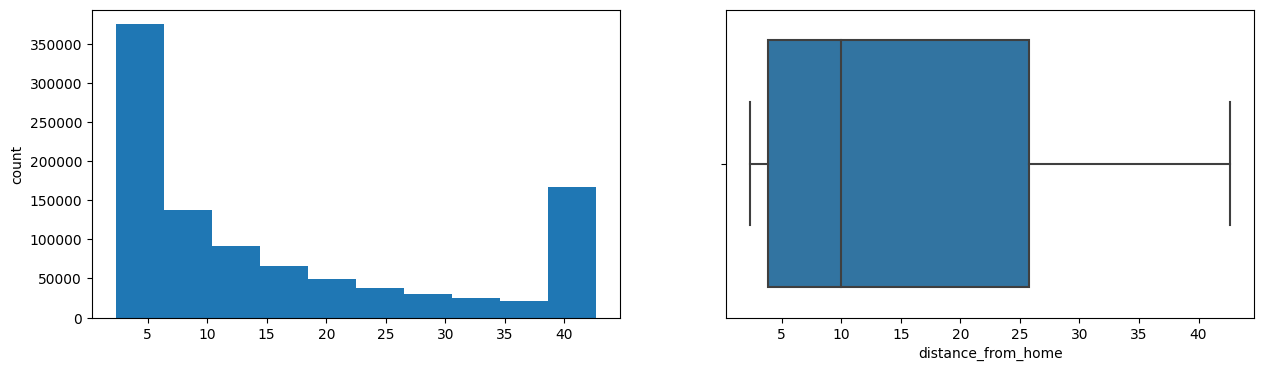

distance_from_last_transaction
Skew : 1.01


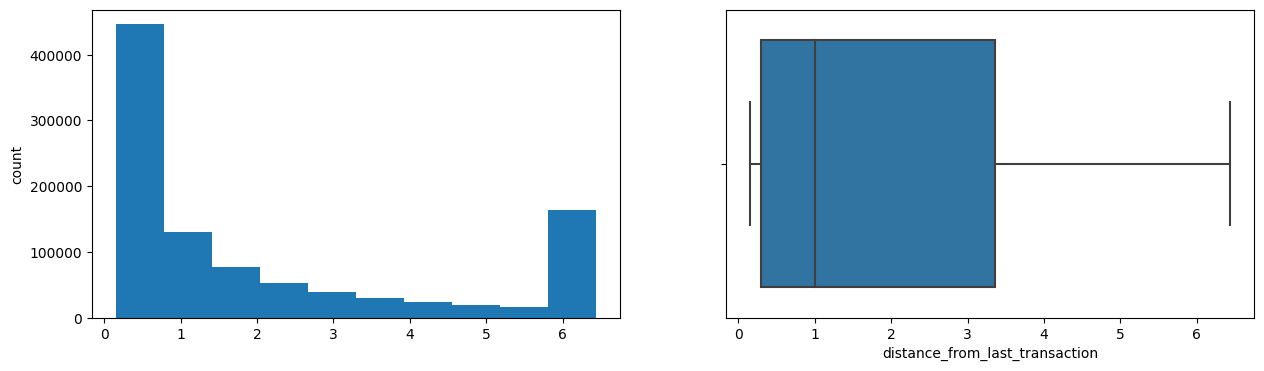

ratio_to_median_purchase_price
Skew : 0.7


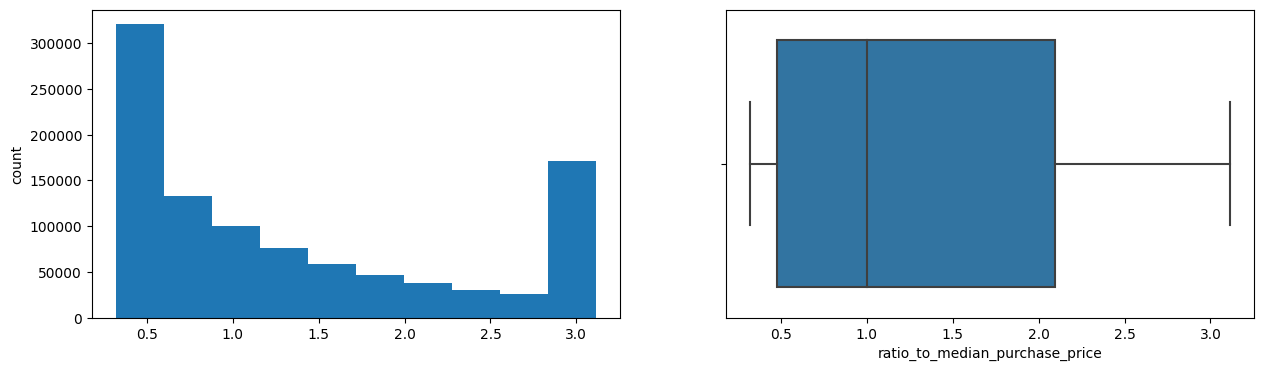

In [ ]:
i = 0 
for colum in data_winsorize.columns:
    i+=1
    print(colum)
    print('Skew :', round(data_winsorize[colum].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data_winsorize[colum].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data_winsorize[colum])
    plt.show()
    if i == 3: break

We can see that by applying Winsorizing it is possible to eliminate outlier.

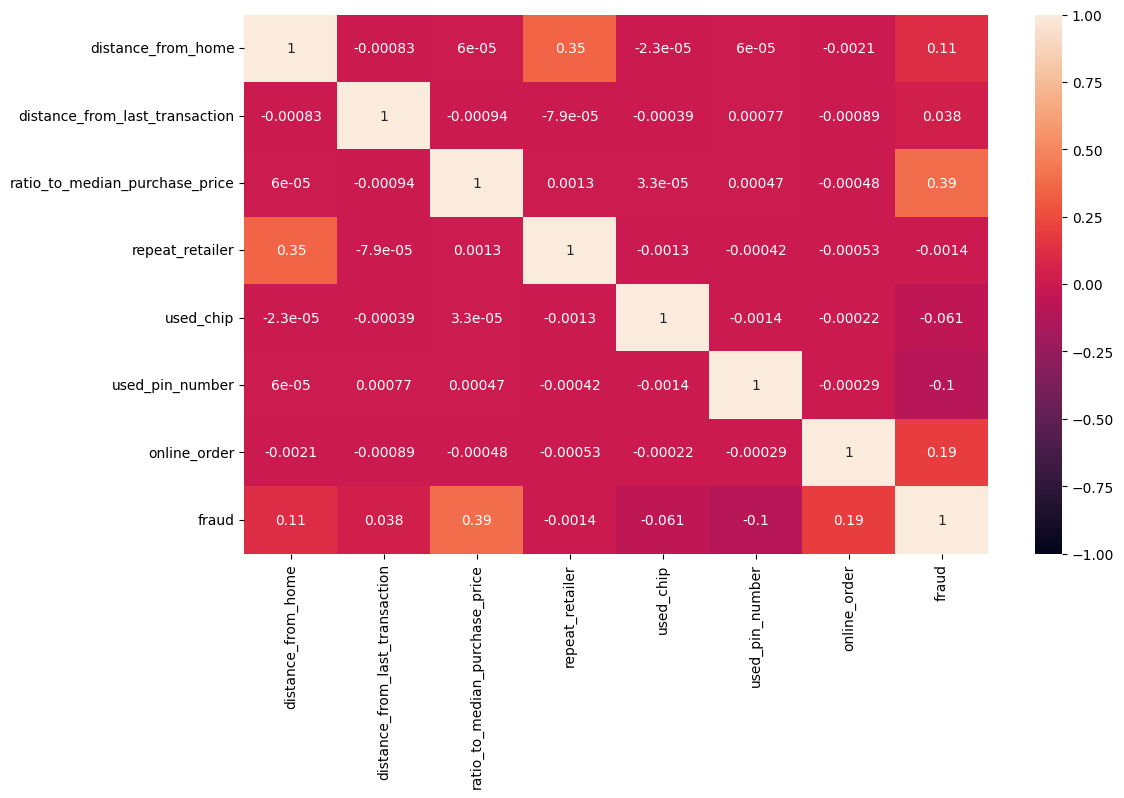

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(data_winsorize.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

Our target characteristic is fraud, so we are going to focus mainly on the correlation of this characteristic with the rest of the feautures of the dataset, in this case we highlight the correlation of fraud with the feauters ratio to the average purchase price, online order and distance to home as in the analysis of the previous dataset.

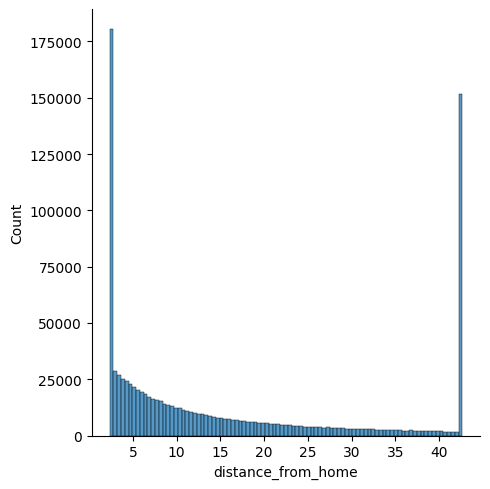

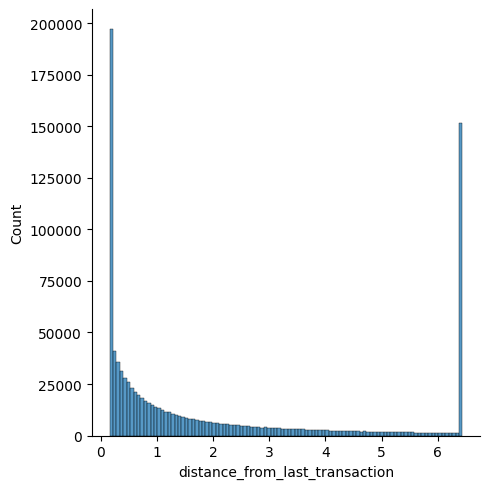

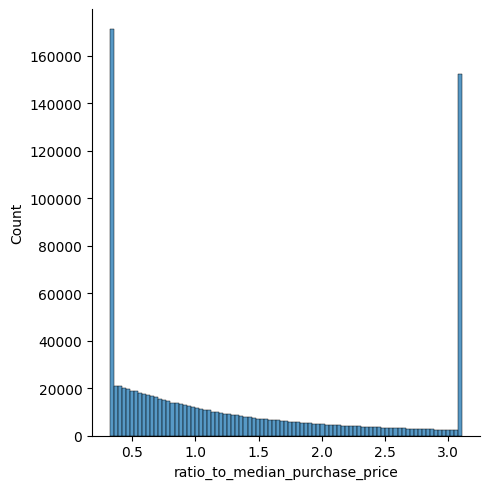

In [ ]:
for i in range(3):
    sns.displot(data_winsorize[data_winsorize.columns[i]])

The bar chart shows a large concentration of values at the extremes which is expected behavior in this dataset, since when applying winsorizing we set the value of the outlier with the most extreme values that are not outliers.

### Normalize

The objective of normalization is to use a common scale in all numerical columns, without distorting the ranges between values so as not to lose information, this allows the creation of new values that maintain the general distribution and proportions of the source data, while keeping the values within the same scale common to all numerical columns used in the model.

In [ ]:
data.to_csv('data_normalize.csv')
data_normalize = pd.read_csv("data_normalize.csv")
def log_transform(target,col):
    for colname in col:
        if (target[colname] == 1.0).all():
            target[colname + '_log'] = np.log(target[colname]+1)
        else:
            target[colname + '_log'] = np.log(target[colname])

log_transform(data_normalize,data_normalize.columns[1:4])
data_normalize.drop(columns=data_normalize.columns[:4],inplace=True)
data_normalize.describe().T

,count,mean,std,min,25%,50%,75%,max
repeat_retailer,1000000.0,0.881536,0.323157,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,1000000.0,0.350399,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,1000000.0,0.100608,0.300809,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,1000000.0,0.650552,0.476796,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,1000000.0,0.087403,0.282425,0.000000,0.000000,0.000000,0.000000,1.000000
distance_from_home_log,1000000.0,2.300682,1.029372,0.848602,1.355322,2.299356,3.248201,3.753549
distance_from_last_transaction_log,1000000.0,-0.002460,1.321043,-1.868503,-1.215133,-0.001351,1.210675,1.862210
ratio_to_median_purchase_price_log,1000000.0,-0.001873,0.806672,-1.141356,-0.743024,-0.002286,0.740207,1.136631


The following graphs show that the feature values ratio to median purchase price, distance from last transaction and distance from home are concentrated at the extremes.

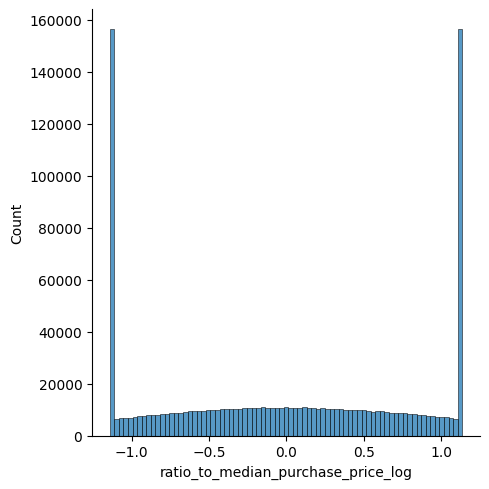

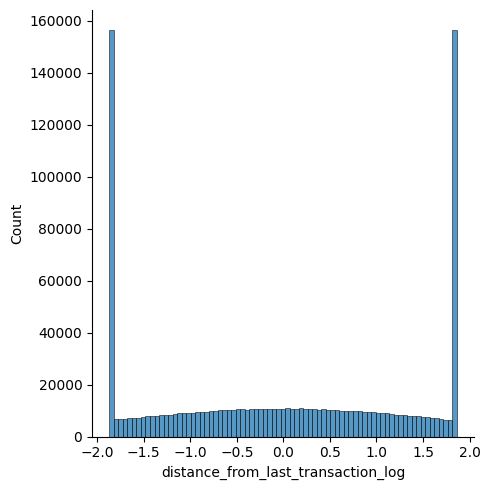

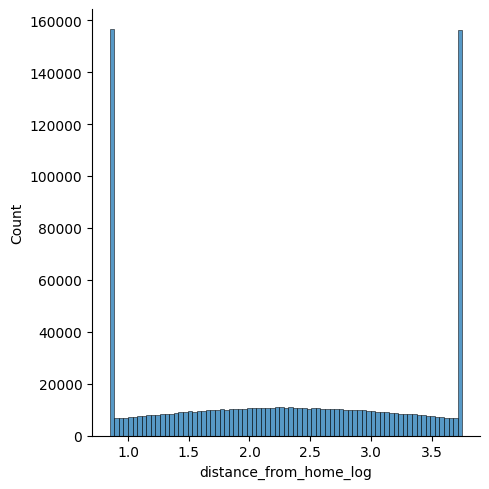

In [ ]:
for i in range(len(data_normalize.columns) -1 ,len(data_normalize.columns)-4,-1):
    sns.displot(data_normalize[data_normalize.columns[i]])

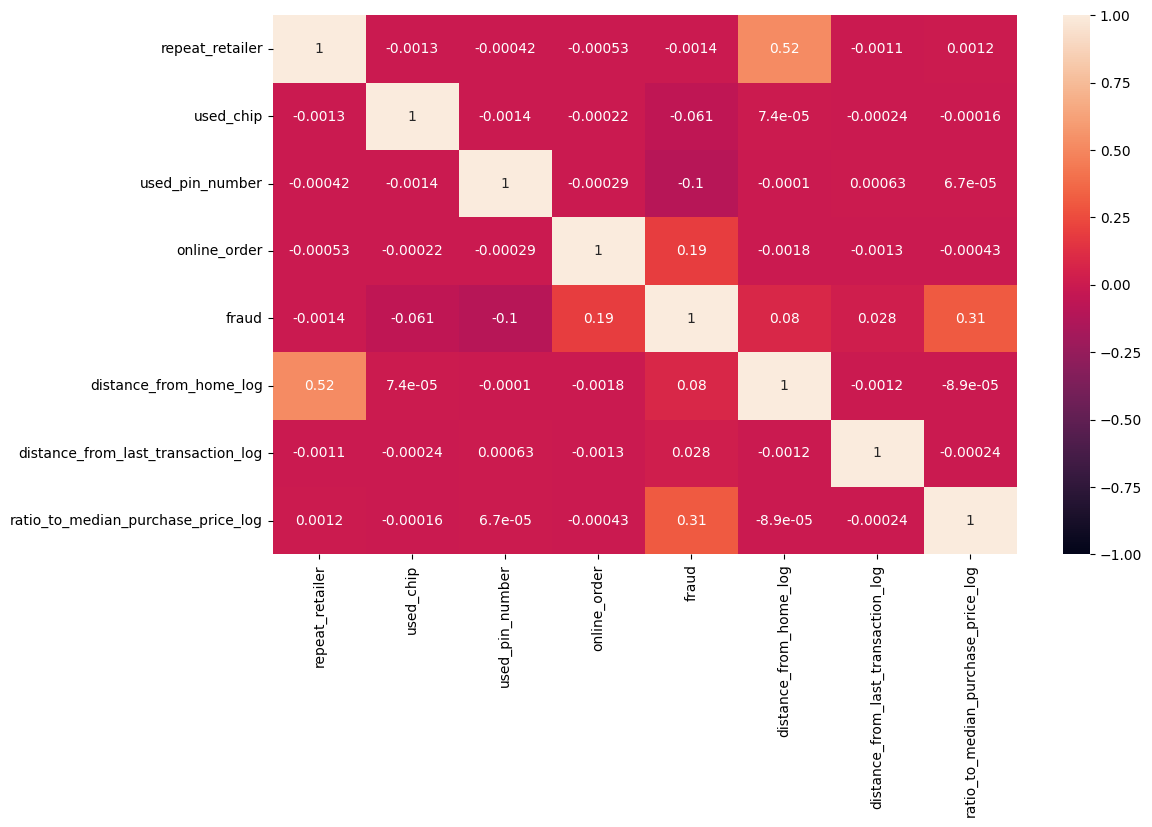

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(data_normalize.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

Our target feature is fraud, so we are going to focus mainly on the correlation of this feature with the rest of the feautures of the dataset, in this case the correlation of fraud with the feauter ratio to median purchase price log stands out.